In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
hist = pd.read_csv('export_dataframe1.csv')
hist.isnull().values.any()

False

In [3]:
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'weighted_price'

In [6]:
hist.tail(10)

,close,high,low,open,volumefrom,volumeto,weighted_price
time,,,,,,,
2020-07-12,9300.95,9339.99,9169.13,9237.13,16385.50,1.516494e+08,9261.8000
2020-07-13,9237.89,9336.42,9201.18,9300.95,25872.33,2.400818e+08,9269.1100
2020-07-14,9256.07,9279.57,9109.70,9237.89,25865.27,2.383085e+08,9220.8075
2020-07-15,9193.22,9272.57,9160.89,9256.07,23480.12,2.163869e+08,9220.6875
2020-07-16,9133.23,9216.53,9029.17,9193.22,27882.77,2.542556e+08,9143.0375
2020-07-17,9156.79,9183.08,9080.61,9133.23,20542.60,1.877101e+08,9138.4275
2020-07-18,9177.22,9205.94,9125.92,9156.79,11952.82,1.095633e+08,9166.4675
2020-07-19,9216.02,9238.30,9113.41,9177.22,12797.83,1.172980e+08,9186.2375
2020-07-20,9164.42,9224.76,9136.90,9216.02,18729.90,1.718770e+08,9185.5250


In [7]:
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [8]:
train, test = train_test_split(hist, test_size=0.2)

In [9]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

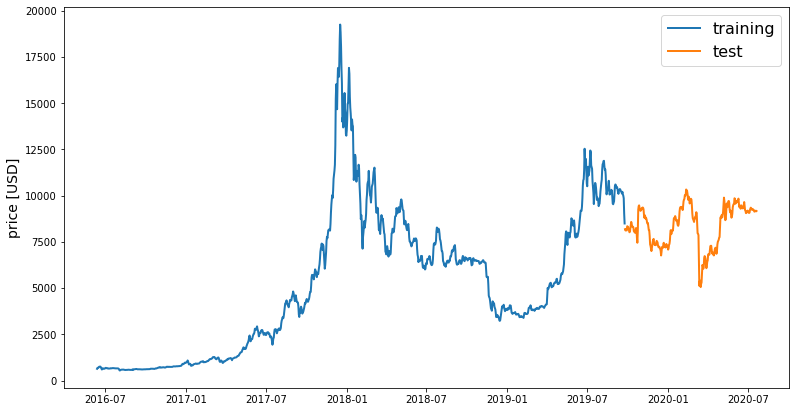

In [10]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [11]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [12]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [13]:
def prepare_data(df, target_col, window_len=5, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [26]:
def build_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [27]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
neuron = 100
epochs = 100
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [28]:
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [29]:
model = build_model(
    X_train, output_size=1, neurons=neuron, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11/100
38/38 [==============================] - 0s 2ms/step - loss: 9.8539e-04
Epoch 12/100
38/38 [==============================] - 0s 2ms/step - loss: 9.4427e-04
Epoch 13/100
38/38 [=========

In [30]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mae = mean_absolute_error(y_test,preds)
error = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print('MAE: %.6f' % mae)
print('R2: %.6f' % r2)
print('Test MSE: %.6f' % error)

MAE: 0.014752
R2: 0.912259
Test MSE: 0.000535


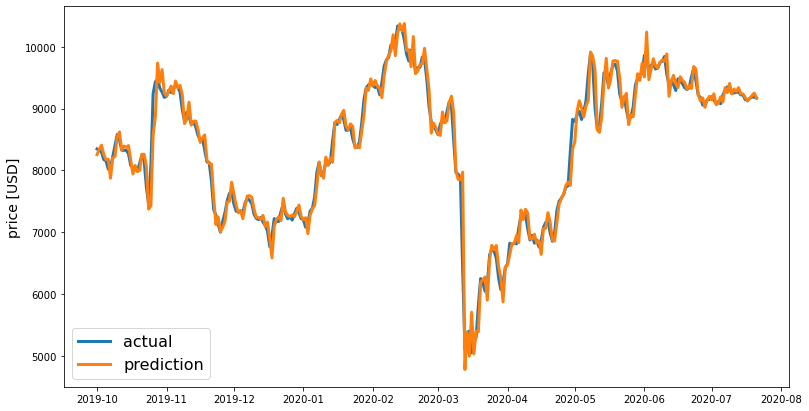

In [31]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)